In [1]:
%load_ext autoreload
%autoreload 2
import hyperspy.api as hs
%matplotlib qt4
import matplotlib.pyplot as plt
import numpy as np
from hyperspy.zeta import *

# s=hs.load('../Data/unheated/A_EDS Spectrum Image.dm3')
# s2=hs.load('../Data/unheated/A_EDS GaAs.hdf5')
# s2.plot()

In [34]:
# s=hs.load('../Data/unheated/HAADF_300k.dm3')
plt.figure()
plt.imshow(s.data)
plt.show()


## Determine thickness

In [10]:
# thickness_map_left=hs.load('../Data/unheated/Thickness Map_leftSide.dm3')
thickness_map=hs.load('../Data/unheated/Thickness Map.dm3')
l = 104 # From Andreas
thickness = thickness_map.isig[100.:200.,70.:190.].data.mean()*l
print(thickness)
print('std',np.std(thickness_map.isig[100.:200.,70.:190.].data*l))

121.975335121
std 3.43808


In [ ]:
s=hs.load('../Data/unheated/B_EDS Spectrum Image.dm3')
s.save('../Data/unheated/B_EDS Spectrum Image.hdf5')
# s.inav[:,8.:68.].save('../Data/unheated/B_EDS_1.hdf5')
# s.inav[:,80.:200.].save('../Data/unheated/B_EDS_2.hdf5')
# s.inav[:,220.:280.].save('../Data/unheated/B_EDS_3.hdf5')
# scrop=s.inav[40.0:200.0, 0.:100.]
# scrop.save('../Data/unheated/A_EDS GaAs.hdf5')

# s_B1=hs.load('../Data/unheated/B_EDS_1.hdf5')
# s_B2=hs.load('../Data/unheated/B_EDS_2.hdf5')
# s_B3=hs.load('../Data/unheated/B_EDS_3.hdf5')

In [ ]:
s_B1.sum('x').sum('y').plot() # E = Pd
s_B2.sum('x').sum('y').plot() # D = Ge
s_B3.sum('x').sum('y').plot() # C = Au

In [2]:
sn = hs.load('../Data/unheated/A_EDS Spectrum Image.dm3')
sn.add_lines(['As_Ka','Ga_Ka','Pd_La','Ge_La','Au_Ma'])
# bw1 = np.array([ 9.79,9.99, 11.09, 11.29])
BW2=[8.57,8.67,11.2,11.3]
# bw3 = np.array([9.25, 9.45,10.1,10.3])
# bw4 = np.array([9.4,9.6,10.2,10.4])
# bw5 = np.array([2.2,2.4,3.7,3.9])
bw7=[1.88,1.96,3.7,3.9] #gold M-line
bw6= np.array([.6,.7,1.4,1.5]) #Ge L-line
# bw=[bw1,bw2,bw3,bw4,bw5,bw6,bw7]
bw=[bw6,bw7,BW2]
plt.close('all')
# sn.add_lines([])
A=sn.sum('x').sum('y')

# sn.plot

In [3]:
%load_ext autoreload
%autoreload 2
A.add_lines(['As_Ka','Ga_Ka','Pd_La','Ge_La','Au_Ma','Ge_Ka'])
A.plot(background_windows=bw,integration_windows=1.2)
plt.xlim([None,12])
plt.xlabel('X-ray energy (keV)',fontsize=16)
plt.ylabel('X-ray counts',fontsize=16)
plt.title(' ')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


C:\Users\Johannes\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\__init__.py:898: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
A.quantification?

In [4]:
%load_ext autoreload
%autoreload 2

plt.close('all')
IW = 1.2
tilt = -np.sqrt(2.3**2+.6**2)

probe_current= [(0.1769+.1747)/2, .1747, .1747,.17485,.175,.175,(.175+.1731)/2,.17325,np.mean([.1734,.1703]),np.mean([.1703,.1728]),.1747,.1747,.1747]

p_GaAs = 5317.6
p_Au = hs.material.elements.Au.Physical_properties.density_gcm3*1000
p_Ge = hs.material.elements.Ge.Physical_properties.density_gcm3*1000
p_Pd = hs.material.elements.Pd.Physical_properties.density_gcm3*1000
 
# s_A = hs.load('../Data/unheated/A_EDS GaAs.hdf5')
# # a_A1 = hs.load('../Data/unheated/A_EDS Ge.hdf5')
# # # a_A2 = hs.load('../Data/unheated/A_EDS Pd.hdf5')
# s_C = hs.load('../Data/unheated/C_EDS Spectrum Image.dm3')
# s_D = hs.load('../Data/unheated/D_EDS Spectrum Image.dm3')
# s_E = hs.load('../Data/unheated/E_EDS Spectrum Image.dm3')
# s_B1=hs.load('../Data/unheated/B_EDS_1.hdf5')
# s_B2=hs.load('../Data/unheated/B_EDS_2.hdf5')
# s_B3=hs.load('../Data/unheated/B_EDS_3.hdf5')

# e=s_C.sum('x').sum('y')
# e.add_elements(['Au'])
# e.add_lines()
# BW_C = np.array([[9.25, 9.45,10.1,10.3]])
# e.plot(background_windows=BW_C)
# return

s=[s_A,s_C,s_D,s_E,s_B1,s_B2,s_B3]

elements = [['As','Ga'],['Au'],['Ge'],['Pd'],['Pd'],['Ge'],['Au']]
# elements = [['Au'],['Au']]
density_list=[p_GaAs,p_Au,p_Ge,p_Pd,p_Pd,p_Ge,p_Au]
# density_list=[p_Au,p_Au]

BW_A = np.array([[ 9.79,9.99, 11.09, 11.29],[ 8.47,8.66,9.67,9.86]])
BW_C = np.array([[9.25, 9.45,10.1,10.3]])
BW_D = np.array([[9.4,9.6,10.2,10.4]])
BW_E = np.array([[2.2,2.4,3.7,3.9]])
BW_C=[[1.88,1.96,3.7,3.9]] #gold M-line
BW_D = np.array([[.6,.7,1.4,1.5]]) #Ge L-line
bw_list=[BW_A,BW_C,BW_D,BW_E,BW_E,BW_D,BW_C]
# bw_list=[BW_C,BW_C]


COMP_GA_AS_WT=(hs.material.atomic_to_weight([.5,.5],['As','Ga'])/100)
comp_list = [COMP_GA_AS_WT, [1],[1],[1],[1],[1],[1]]
time = [.01, .1, .1, .1, .01, .01, .01]

lines=[['As_Ka','Ga_Ka'],['Au_Ma'],['Ge_La'],['Pd_La'],['Pd_La'],['Ge_La'],['Au_Ma'] ]
# lines=['Au_Ma']

# for edx in [s_C,s_B3]:
#     time = edx.data.shape[0]*edx.data.shape[1]*0.01
#     edx=edx.sum('x').sum('y')
#     edx.add_elements(['Au'])
#     edx.add_lines(lines)
#     edx.plot(background_windows=BW5)
#     edx.set_microscope_parameters(beam_current=.1747, tilt_stage=tilt, real_time=time, elevation_angle=24.3, azimuth_angle=0.0)
#     s_int=edx.get_lines_intensity(background_windows=BW5, integration_windows=IW,plot_result=0)
    
#     zeta = determine_zeta_factor(edx, s_int, [1], thickness, p_Au)

#     for z in zeta:
#         print('zeta',np.nanmean(z.data.flatten()))
# return
    
for edx, current, density, element,bw, comp, t, line \
in zip(s,probe_current, density_list, elements,bw_list,comp_list, time, lines):
#     if element[0] is not 'Ge':
#         continue
#     print(element, thickness, current, density, bw)
#     edx.plot()
#     time=t
    time = edx.data.shape[0]*edx.data.shape[1]*t
    
#     print('time',time)
    
    edx=edx.sum('x').sum('y')
    edx.add_elements(element)
#     print(line)
#     if type(line) != list:
#         line=[line]
    edx.add_lines(line)
#     edx.add_lines()
#     plt.figure(str(element))
#     edx.plot()
#     print(edx.metadata)
#     if element[0] == 'Ge':
#         edx.plot(background_windows=bw)
#     print(edx.metadata)
    
    edx.set_microscope_parameters(beam_current=current, tilt_stage=tilt, real_time=time, elevation_angle=24.3, azimuth_angle=0.0)
    s_int=edx.get_lines_intensity(background_windows=bw, integration_windows=IW,plot_result=0)
    
    zeta = determine_zeta_factor(edx, s_int, comp, thickness, density)
    print(element)
    for z in zeta:
        print('zeta',np.nanmean(z.data.flatten()))
        print('std',np.std(z.data))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


['As', 'Ga']
zeta 706.458581674
std 0.0
zeta 607.860488895
std 0.0
['Au']
zeta 2396.59596395
std 0.0
['Ge']
zeta 900.417380749
std 0.0
['Pd']
zeta 1248.39804784
std 0.0
['Pd']
zeta 1318.41635454
std 0.0
['Ge']
zeta 899.515316745
std 0.0
['Au']
zeta 2387.42319189
std 0.0


In [51]:
#Only one
IW = 1.2
tilt = -np.sqrt(2.3**2+.6**2)

probe_current= [(0.1769+.1747)/2, .1747, .1747,.17485,.175,.175,(.175+.1731)/2,.17325,np.mean([.1734,.1703]),np.mean([.1703,.1728]),.1747,.1747,.1747]
p_GaAs = 5317.6
p_Au = hs.material.elements.Au.Physical_properties.density_gcm3*1000
p_Ge = hs.material.elements.Ge.Physical_properties.density_gcm3*1000
p_Pd = hs.material.elements.Pd.Physical_properties.density_gcm3*1000

BW_A = np.array([[ 9.79,9.99, 11.09, 11.29],[ 8.47,8.66,9.67,9.86]])
BW_C = np.array([[9.25, 9.45,10.1,10.3]])
BW_D = np.array([[9.4,9.6,10.2,10.4]])
BW_E = np.array([[2.2,2.4,3.7,3.9]])
BW_C=[[1.88,1.96,3.7,3.9]] #gold M-line
# BW_D = np.array([[.6,.7,1.4,1.5]]) #Ge L-line

s = hs.load('../Data/unheated/A_EDS Ge.hdf5')
bw = BW_D
current = probe_current[0]
density=p_Ge
comp=[1]
time=.01*s.data.shape[0]*s.data.shape[1]
s.add_elements(['Ge'])
s.add_lines(['Ge_Ka'])

s.mean('x').mean('y').plot(background_windows=bw)
s.set_microscope_parameters(beam_current=current, tilt_stage=tilt, real_time=time, elevation_angle=24.3, azimuth_angle=0.0)
s_int=s.get_lines_intensity(background_windows=bw, integration_windows=IW,plot_result=0)

zeta = determine_zeta_factor(s, s_int, comp, thickness, density)
for z in zeta:
    print('zeta',np.nanmean(z.data.flatten()))

C:\Users\Johannes\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\__init__.py:898: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


zeta 6987644.90399


### zeta factors

In [42]:
As=1412.91716335
Ga=1215.72097779
# Ga_l=1626.12587259

Au1=6945.31059159
Au2=7245.99584755

Ge1=1482.31684522
# Ge1_l=1791.73734361
Ge2=1463.72509386

Pd1=2496.79609568 # This is Pd_l, not Pd_m
Pd2=2636.83270908

kAu_l=4.892
kGe_k=2.617
# kPd_m=3.825

kGa_k=2.4919
# kGa_l=4.719
kAs_k=2.835
# kAs_l=4.315

## New zeta factors (0.1, 0.01 seconds)

In [7]:

As= 706.458581674
Ga= 607.860488895

Au1= 3472.6552958

# Ge1= 741.158422611

Pd1= 1248.39804784

Pd2= 1318.41635454

Ge2= 731.862546929

Au2= 3450.47421312

AuM=np.mean(2387,2397) #2387 2396
GeL = 900

In [31]:

from itertools import combinations
element=['Ga','As','Au','Ge']
zeta=[Ga,As,AuM,Ge]
kfact=[kGa_k,kAs_k,kAu_m,kGe_k]
mydict = dict()
for e,z,k in zip(element,zeta,kfact):
    mydict[e]={}
    mydict[e]['k']=k
    mydict[e]['z']=z
for p in combinations(element,2):
    print(p)
    for i in ['k','z']:
        print(i, mydict[p[0]][i]/mydict[p[1]][i])

('Ga', 'As')
k 0.8789770723104056
z 0.853046594982
('Ga', 'Au')
k 0.64423474663909
z 0.248278739829
('Ga', 'Ge')
k 0.9521971723347343
z 0.803692030617
('As', 'Au')
k 0.7329369183040331
z 0.29104944711
('As', 'Ge')
k 1.0833014902560183
z 0.942143178748
('Au', 'Ge')
k 1.4780282766526556
z 3.23705538046


#### Make zeta-k-value plots

[ 1.2442577   1.17226891  2.15686275  4.02016807]


In [3]:
import glob
import hyperspy.api as hs
%matplotlib qt4
import matplotlib.pyplot as plt
PATH='/home/johannes/Desktop/Link to Data/160506_SC239_X/'
PATH='/home/johannes/Desktop/Link to Data/unheated/'
p=glob.glob(PATH+'*Survey Image (active)*')
for r in p:
    s=hs.load(r)
    plt.figure(r),plt.imshow(s.data)


# Quantification

In [19]:
# # Non-heat treated
# s=hs.load('../Data/unheated/A_EDS Spectrum Image.hdf5')
# s=s.inav[60.:180.,:]
# s=hs.load('../Data/unheated/A_EDS Spectrum Image_60-180.hdf5')
# return
# s.plot()
# return
s=hs.load('../Data/unheated/B_EDS Spectrum Image.hdf5')
    # # s.plot()
    # # s.change_dtype('float')
    # # s.decomposition()
    # # s.get_decomposition_model(6)
    # # s.save('../Data/unheated/A_EDS Spectrum Image.hdf5')
# # plt.close('all')
from scipy.signal import cspline1d as spline
probe_current= [(0.1769+.1747)/2, .1747, .1747,.17485,.175,.175,(.175+.1731)/2,.17325,np.mean([.1734,.1703]),np.mean([.1703,.1728]),.1747,.1747,.1747]
# BW1 = np.array([9.79,9.99, 11.09, 11.29])
BW1=[8.3,8.6,11.2,11.3]
# BW2=np.array([8.47,8.66,9.67,9.86])
BW2=[8.57,8.67,11.2,11.3]
# BW3= np.array([9.25, 9.45,10.1,10.3])
BW3=BW2
# BW4 = np.array([9.4,9.6,10.2,10.4])
# BW4=[8.57,8.67,11.2,11.3]
# BW4=[7.3,7.5,10.5,10.7]
BW4=BW2
# BW5 = np.array([2.2,2.4,3.7,3.9])
BW5=[1.88,1.96,3.7,3.9]
BW3=BW5 #Gold M-alpha
BW4 = np.array([.6,.7,1.4,1.5]) #Ge L-line

# bw=[BW1,BW2,BW3,BW4,BW5]
bw=[BW1,BW2,BW3,BW5]#A
# bw=[BW1,BW2,BW4,BW5]#A GeL
# bw=[BW3,BW4,BW5] #B


plt.close('all')
# elements=['As','Ga','Au','Ge','Pd']
elements=['As','Ga','Ge','Pd']
# elements=['Au','Ge','Pd']
s.add_elements(elements)
# lines=['As_Ka','Ga_Ka','Au_Ma','Ge_La','Pd_La']
lines=['As_Ka','Ga_Ka','Ge_La','Pd_La']
# lines=['Au_Ma','Ge_Ka','Pd_La']
# lines=['Au_Ma','Ge_La','Pd_La']
s.add_lines(lines)
# s.add_lines()
s.sum('x').sum('y').plot(background_windows=bw)
s.set_microscope_parameters(real_time=0.01,beam_current=probe_current[0])
s_ints = s.get_lines_intensity(integration_windows=1.2,background_windows=bw, only_lines=lines)


#     if el not in ['As','Ge','Pd','Au']:
#     if el not in ['Pd','Au','Pd','As','Ge']:
#         continue
#     print(el)
#     plt.figure(str(el))
#     cmp=cmp.data
#     cmp=cmp/100*255.
#     cmp[cmp<10]=np.nan
#     cmp[cmp>100]=255
#     print(c)
#     plt.imshow(cmp, cmap=c,alpha=1,interpolation='none')
# plt.show()
#     plt.plot(spline(cmp.data, lamb=lamb))
# plt.legend(s.metadata.Sample.elements)

In [20]:
plt.close('all')
# s.add_lines(['As_Ka','Ga_Ka','Ge_La','Pd_La'])
s.sum('x').sum('y').plot(background_windows=bw)
plt.show()

In [21]:
from hyperspy import zeta_abscorr as zc
print('h')
# As=1412.91716335
# Ga=1215.72097779
# Au1=6945.31059159
# Ge1=1482.31684522
# Pd1=2496.79609568 # This is Pd_l, not Pd_m
# Ga_l=1626.12587259
# Ge1_l=1791.73734361
# zeta=[As,Ga_l,Au1,Ge1_l,Pd1]
# zeta=[As,Ga,Ge1,Pd1]
As=np.mean([689,706])
Ga=np.mean([582,608])
Ge=np.mean([732,741,748])
Pd=np.mean([1248,1284,1318])
Au=np.mean([2387,2397])
GeL=np.mean([900.,900.,933])
AuM=np.mean((2387,2397))

AsS=np.std([689,706])
GaS=np.std([582,608])
GeS=np.std([732,741,748])
PdS=np.std([1248,1284,1318])
AuS=np.std([2387,2397])
GeLS=np.std([900.,900.,933])
AuMS=np.std((2387,2397))


kAu_l=4.892
kAu_m=3.868
kGe_k=2.617
kGe_l=4.513
kPd_m=3.825
kGa_k=2.4919
# kGa_l=4.719
kAs_k=2.835

zeta=[As,Ga,Ge,Pd]
# zeta = [Au,GeL,Pd]
# zetaS=[AuS,GeLS,PdS]
# zeta=[As,Ga,AuM,GeL,Pd]
kfactors = [kAs_k,kGa_k, kGe_k,kPd_m]
# kfactors=[kAu_m,kGe_l,kPd_m]
# kfactors = [kAs_k,kGa_k, kAu_m, kGe_k,kPd_m]

s_comp_zeta, s_pt = s.quantification(s_ints, 'zeta', zeta)
s_comp_cl = s.quantification(s_ints, 'CL', kfactors)
s_comp_abs, s_pt = zc.quantification_zeta(s, s_ints, zeta, convergence_precision=0.001)

s_comp_linescan_abs = [c.mean('x') for c in s_comp_abs]
s_comp_linescan_zeta = [c.mean('x') for c in s_comp_zeta]
s_comp_linescan_cl = [c.mean('x') for c in s_comp_cl]


lamb=10

# plt.figure()
# for cmp,el,i,c in zip(s_comp_linescan,elements,s_ints, cmap):
#     plt.plot(cmp)


    
# for cmp,el,i in zip(s_comp_linescan,elements,s_ints):
#     plt.plot(spline(cmp.data, lamb=lamb))
# plt.legend(elements)
# print(s.metadata.Sample.elements)


# kAu_l=4.892
# kGe_k=2.617
# kPd_m=3.825
# kGa_k=2.4919
# # kGa_l=4.719
# kAs_k=2.835

# # kfactors = [kAs_k,kGa_k, kAu_l, kGe_k,kPd_m]
# kfactors = [kAs_k,kGa_k, kGe_k,kPd_m]
# s_comp_cl = s.quantification(s_ints, 'CL', kfactors)
# s_comp_linescan = [c.mean('x') for c in s_comp]
# lamb=1

# plt.figure('kfactor')
# for cmp,el,i in zip(s_comp_linescan,elements,s_ints):
#     plt.plot(spline(cmp.data, lamb=lamb))
# plt.legend(elements)

h
Solution converged to less than 0.001 weight percent, after 12 iterations.


In [11]:
s_comp_zetaopp, s_pt = s.quantification(s_ints, 'zeta', np.add(zeta,zetaS))
# s_comp_clopp = s.quantification(s_ints, 'CL', kfactors)
s_comp_absopp, s_pt = zc.quantification_zeta(s, s_ints, np.add(zeta,zetaS), convergence_precision=0.001)

s_comp_linescan_absopp = [c.mean('x') for c in s_comp_absopp]
s_comp_linescan_zetaopp = [c.mean('x') for c in s_comp_zetaopp]
# s_comp_linescan_clopp = [c.mean('x') for c in s_comp_clopp]

s_comp_zetaned, s_pt = s.quantification(s_ints, 'zeta', np.subtract(zeta,zetaS))
# s_comp_clned = s.quantification(s_ints, 'CL', kfactors)
s_comp_absned, s_pt = zc.quantification_zeta(s, s_ints, np.subtract(zeta,zetaS), convergence_precision=0.001)

s_comp_linescan_absned = [c.mean('x') for c in s_comp_absned]
s_comp_linescan_zetaned = [c.mean('x') for c in s_comp_zetaned]
# s_comp_linescan_clned = [c.mean('x') for c in s_comp_clned]

Solution converged to less than 0.001 weight percent, after 57 iterations.
Solution converged to less than 0.001 weight percent, after 53 iterations.


In [10]:
np.subtract

array([4, 6, 8])

In [26]:
plt.close('all')
from scipy.signal import cspline1d as spline
l=10
# elements.reverse()
print(elements)
colors=['r','g','b']
for i, el in enumerate(elements):
    plt.figure('1_'+str(el)+'_nm')
    plt.hold(True)
    cz=s_comp_linescan_zeta[i]
#     cz_opp=s_comp_linescan_zetaopp[i]
#     cz_ned=s_comp_linescan_zetaned[i]
    
    ccl=s_comp_linescan_cl[i]
    
    cab=s_comp_linescan_abs[i]
#     cab_opp=s_comp_linescan_absopp[i]
#     cab_ned=s_comp_linescan_absned[i]
    
    scale=s.axes_manager.as_dictionary()['axis-0']['scale']
    x = np.arange(len(cab.data))*scale
    plt.plot(x,spline(ccl.data,l),'b')
    plt.plot(x,spline(cz.data,l),'g')
    plt.plot(x,spline(cab.data,l),'r')
#     plt.plot(x,spline(cz_opp.data,l),'g--')
#     plt.plot(x,spline(cz_ned.data,l),'g--')
#     plt.plot(x,spline(cab_opp.data,l),'r--')
#     plt.plot(x,spline(cab_ned.data,l),'r--')
#     plt.tight_layout()
#     plt.xlim([None,360*scale])
#     if i < 2:
#         plt.ylim([-10,50])
#     else:
    plt.ylim([-10,110])
    plt.legend(['CL','Zeta','Zeta (abs)'],loc='best')
    plt.grid(axis='y')
    plt.xlabel('X (nm)')
    plt.ylabel('Composition (%)')
    plt.savefig('../PROJECT/thesis/fig/q/2_GaAsPdGe_'+el)
plt.show()

['As', 'Ga', 'Ge', 'Pd']


In [18]:
plt.figure()
# elements.reverse()
plt.hold(1)
plt.grid(axis='y',which='both')
colors=['r','g','b']
for i in range(len(elements)):
    cab=s_comp_linescan_abs[i]
#     cabopp=s_comp_linescan_absopp[i]
#     cabned=s_comp_linescan_absned[i]
    scale=s.axes_manager.as_dictionary()['axis-0']['scale']
    x = np.arange(len(cab.data))*scale
    plt.plot(x,spline(cab.data,l))
#     plt.plot(x,spline(cabopp.data,l),'--')
#     plt.plot(x,spline(cabned.data,l),'--')
    plt.tight_layout()
    plt.xlim([None,360*scale])
#     plt.ylim([-10,110])
    plt.xlabel('X (nm)')
    plt.ylabel('Composition (%)')
print(elements)
plt.legend(elements,loc='best')
plt.savefig('../PROJECT/thesis/fig/q/1_all_abscorr2_GePdAu')
plt.show()

['Au', 'Ge', 'Pd']


### With abs correction

In [41]:
from hyperspy import zeta_abscorr as zc

As=np.mean([689,706])
Ga=np.mean([582,608])
Ge=np.mean([732,741,748])
Pd=np.mean([1248,1284,1318])
Au=np.mean([3450,3473])
zeta=[As,Ga,Ge,Pd]

s_comp, s_pt = zc.quantification_zeta(s, s_ints, zeta, convergence_precision=None)#0.00001)

s_comp_linescan = [c.mean('x')[:360] for c in s_comp]
lamb=1

plt.figure('zeta-abscorr3')
for cmp,el,i in zip(s_comp_linescan,elements,s_ints):
    plt.plot(spline(cmp.data, lamb=lamb))
plt.legend(elements)


/home/johannes/hyperspy/hyperspy/zeta_abscorr.py:129: RuntimeWarning: invalid value encountered in true_divide
  comp = np.asarray([zi / zi_sum for zi in zi_list])
/home/johannes/hyperspy/hyperspy/misc/material.py:42: RuntimeWarning: invalid value encountered in true_divide
  atomic_percent[i] /= sum_weight


In [29]:
plt.close('all')

In [6]:
s_comp, s_pt = s.quantification(s_ints, 'zeta', zeta)
cmap = ['Blues','Reds','Blues','Greens','Reds']
s_comp_linescan = [c.mean('x') for c in s_comp]
lamb=100

# plt.figure()
# for cmp,el,i,c in zip(s_comp_linescan,elements,s_ints, cmap):
#     plt.plot(cmp)
plt.figure()
for cmp,el,i,c in zip(s_comp_linescan,elements,s_ints, cmap):
    plt.plot(spline(cmp.data, lamb=lamb))


### HEAT TREATED!

In [19]:
#Heat-treated
from hyperspy import zeta_abscorr as zc
from scipy.signal import cspline1d as spline
# BW1 = np.array([9.79,9.99, 11.09, 11.29])
BW1=[8.3,8.6,11.2,11.3]
# BW2=np.array([8.47,8.66,9.67,9.86])
BW2=[8.57,8.67,11.2,11.3]
# BW3= np.array([9.25, 9.45,10.1,10.3])
BW3=BW2
# BW4 = np.array([9.4,9.6,10.2,10.4])
# BW4=[8.57,8.67,11.2,11.3]
# BW4=[7.3,7.5,10.5,10.7]
BW4=BW2
# BW5 = np.array([2.2,2.4,3.7,3.9])
BW5=[1.88,1.96,3.7,3.9]
BW3=BW5 #Gold M-alpha
BW_ge = np.array([.6,.7,1.4,1.5]) #Ge L-line
BW_gek=BW2
# bw=[BW1,BW2,BW3,BW4,BW5]
bw=[BW1,BW2,BW_gek,BW5]#,BW3]
# bw=[BW3,BW4,BW5]

As=np.mean([706])
Ga=np.mean([608])
GeK=np.mean([732,741,748])
Pd = np.mean([1248,1284,1318])
Au = np.mean([2387,2397])
Ge = np.mean([900,900,933])
GaL=826
AsL=955
GeL=np.mean([898,901,933])


kAu_l=4.892
kAu_m=3.868
kGe_k=2.617
kGe_l=4.513
kPd_m=3.825
kGa_k=2.4919
kAs_k=2.835
kAuM=3.868
kGeK=2.617
kPdL=3.825
kGaK=2.492
kGeL=4.513
kAsK=2.835
kGaL=4.719
kAsL=4.315

# kfactors = [kAs_k,kGa_k, kAu_l, kGe_k,kPd_m]
zeta = [As,Ga,GeK,Pd]#,Au]
kfactors = [kAs_k, kGa_k, kGe_k,kPd_m]#,kAu_m]

elements=['As','Ga','Ge','Pd']#,'Au']
lines = np.array(['As_Ka','Ga_Ka','Ge_Ka','Pd_La'])#,'Au_Ma'])
bw=[BW1,BW2,BW_gek,BW5]

##### Attempt with AU, without GaAs ######
zeta= [AsL,Au,GaL,GeL,Pd]
kfactors=[kAsL,kAuM,kGaL,kGe_l,kPd_m]
elements=['As','Au','Ga','Ge','Pd']
lines=np.array(['As_La','Au_Ma','Ga_La','Ge_La','Pd_La'])
bwGaAsGeL=[.6,.85,1.5,1.6]
bwAuM=[1.88,1.96,3.7,3.9]
bw=[bwGaAsGeL, bwAuM,bwGaAsGeL,bwGaAsGeL,bwAuM]# BW3,BW_ge,BW5]

plt.close('all')
# sD=hs.load('../Data/160506_SC239_X/D_EDS Spectrum Image.dm3') #For D/E
# sE=hs.load('../Data/160506_SC239_X/E_EDS Spectrum Image.dm3') #For D/E
sB=hs.load('../Data/160506_SC239_X/B_EDS Spectrum Image_top.hdf5')
sC=hs.load('../Data/160506_SC239_X/C_EDS Spectrum Image_behindC.hdf5')
sF = hs.load('../Data/160506_SC239_X/F_EDS Spectrum Image_bright.hdf5')
s=[sB,sC,sF]
# s=[sD,sE]
lamb=10
# currentE = np.mean((0.1175,0.1169)) #E
# currentD = np.mean((0.1175,0.1181)) #D
# currents=[currentD,currentE]
currents = [.1206,np.mean((.1194,.1181)),np.mean((.1169,.1175))]
s_comp_linescan_abs=[]
s_comp_linescan_zeta=[]
s_comp_linescan_cl=[]
s_comp_absl=[]
s_comp_zetal=[]
s_comp_cll=[]
# for i,s in enumerate([s_top, s_bottom]):
for i,(s,current) in enumerate(zip(s,currents)):

    s.add_elements(elements)
    s.add_lines(lines)
    s.mean('x').mean('y').plot(background_windows=bw)
    s.metadata
    s.set_microscope_parameters(real_time=0.1,beam_current=current)
    s_ints = s.get_lines_intensity(integration_windows=1.2,background_windows=bw,only_lines=lines)

    s_comp_zeta, s_pt = s.quantification(s_ints, 'zeta', zeta)
    s_comp_cl = s.quantification(s_ints, 'CL', kfactors)
    s_comp_abs, s_pt = zc.quantification_zeta(s, s_ints, zeta, convergence_precision=0.00001)
#     s_comp_linescan_abs.append([c.mean('y') for c in s_comp_abs])
#     s_comp_linescan_zeta.append([c.mean('y') for c in s_comp_zeta])
#     s_comp_linescan_cl.append([c.mean('y') for c in s_comp_cl])
    
    s_comp_absl.append(s_comp_abs)
    s_comp_zetal.append(s_comp_zeta)
    s_comp_cll.append(s_comp_cl)


Solution converged to less than 1e-05 weight percent, after 15 iterations.
Solution converged to less than 1e-05 weight percent, after 15 iterations.
Solution converged to less than 1e-05 weight percent, after 15 iterations.


In [84]:
elements=['Au','Ge','Pd']

In [20]:
def bin_ndarray(ndarray, new_shape, operation='sum'):
    """
    Bins an ndarray in all axes based on the target shape, by summing or
        averaging.

    Number of output dimensions must match number of input dimensions and 
        new axes must divide old ones.

    Example
    -------
    >>> m = np.arange(0,100,1).reshape((10,10))
    >>> n = bin_ndarray(m, new_shape=(5,5), operation='sum')
    >>> print(n)

    [[ 22  30  38  46  54]
     [102 110 118 126 134]
     [182 190 198 206 214]
     [262 270 278 286 294]
     [342 350 358 366 374]]

    """
    operation = operation.lower()
    if not operation in ['sum', 'mean']:
        raise ValueError("Operation not supported.")
    if ndarray.ndim != len(new_shape):
        raise ValueError("Shape mismatch: {} -> {}".format(ndarray.shape,
                                                           new_shape))
    compression_pairs = [(d, c//d) for d,c in zip(new_shape,
                                                  ndarray.shape)]
    flattened = [l for p in compression_pairs for l in p]
    ndarray = ndarray.reshape(flattened)
    for i in range(len(new_shape)):
        op = getattr(ndarray, operation)
        ndarray = op(-1*(i+1))
    return ndarray


# plt.close('all')
# from scipy.signal import cspline1d as spline
from os import makedirs
# print(s_zeta)
l=10
print(elements)
folder=['B','C','F']
# folder=['D','E']
plt.ioff()
plt.close('all')
scales=[sD.axes_manager.as_dictionary()['axis-0']['scale'],sE.axes_manager.as_dictionary()['axis-0']['scale']]
scales=[1,1,1]
f=open('../PROJECT/thesis/fig/q/B-C-F/all_lines.txt','w+')
for a,(s_zeta, s_cl,s_abs,scale) in enumerate(zip(s_comp_zetal, s_comp_cll, s_comp_absl,scales)):
    for i, el in enumerate(elements):
        for s_,tech in zip([s_zeta, s_cl, s_abs],['zeta','CL','zetaAbs']):
#         for s_,tech in zip([s_abs, s_cl],['zeta','CL']):
#             plt.figure()
            data = s_[i].data#-s_zeta[i].data
            mean = data.mean()
            std=np.std(data)
#             data = bin_ndarray(data, new_shape = (data.shape[0]/2,data.shape[1]/2), operation='mean')
#             plt.imshow(data, cmap='Set1',extent=[0,data.shape[0]*scale,0,data.shape[1]*scale])
#             plt.xlabel('nm')
#             plt.ylabel('nm')
#             plt.colorbar(label='Composition (%)')
#             try:
#                 makedirs('../PROJECT/thesis/fig/q-new/'+folder[a]+'/oldzeta-diff/')
#             except FileExistsError:
#                 pass
#             plt.savefig('../PROJECT/thesis/fig/q-new/'+folder[a]+'/oldzeta-diff/'+str(el)+'_'+str(tech))
            print(s_[i],'\n',folder[a]+','+str(el)+','+str(tech)+', '+str(mean)+'  '+str(std))
            f.write(str(mean)+' '+str(std)+'\n')
f.close()
# plt.show()

['As', 'Au', 'Ga', 'Ge', 'Pd']
<BaseSignal, title: atomic percent of As, dimensions: (59, 35|)> 
 B,As,zeta, 10.8281808285  3.63885186162
<BaseSignal, title: atomic percent of As, dimensions: (59, 35|)> 
 B,As,CL, 12.1797212684  4.03448259755
<BaseSignal, title: Atomic percent of As, dimensions: (59, 35|)> 
 B,As,zetaAbs, 13.8717164406  4.38626765064
<BaseSignal, title: atomic percent of Au, dimensions: (59, 35|)> 
 B,Au,zeta, 2.99809281027  2.48582641412
<BaseSignal, title: atomic percent of Au, dimensions: (59, 35|)> 
 B,Au,CL, 1.22613697706  1.03735733254
<BaseSignal, title: Atomic percent of Au, dimensions: (59, 35|)> 
 B,Au,zetaAbs, 2.78577486773  2.29165007725
<BaseSignal, title: atomic percent of Ga, dimensions: (59, 35|)> 
 B,Ga,zeta, 4.179930591  2.50517641908
<BaseSignal, title: atomic percent of Ga, dimensions: (59, 35|)> 
 B,Ga,CL, 5.91535341689  3.49063051819
<BaseSignal, title: Atomic percent of Ga, dimensions: (59, 35|)> 
 B,Ga,zetaAbs, 4.59412548649  2.69849864305
<Base

In [27]:
f=open('a-txt','a')
f.close()

### Not really relevant

In [ ]:
from scipy.signal import cspline1d as spline
print(s_comp_linescan[0].data.min())
l=[]
lamb=1000
for cmp in s_comp_linescan:
    l.append(spline(cmp.data, lamb=lamb))
    
for i in range(len(s_comp_linescan)):
#     plt.plot(s_comp_linescan[i])
    plt.plot(l[i])

In [ ]:
# s=hs.load('../Data/unheated/A_EDS GaAs.hdf5')
%load_ext autoreload
%autoreload 2
from skimage.transform import rescale
from hyperspy import project_routine

eds_scale=s.axes_manager.as_dictionary()['axis-1']['scale']
thickness_scale=t.axes_manager.as_dictionary()['axis-1']['scale']
print(eds_scale, thickness_scale)

th=thickness_map_rotated
thick=((th-th.min())/th.max()*255).astype('uint8')
eds=rescale(eds_mean,(eds_scale/thickness_scale))
eds = eds[:1000,:]
eds=((eds-eds.min())/(eds.max()-eds.min())*255).astype('uint8')
print(eds.max())
plt.figure('eds'),plt.imshow(eds)
plt.figure('th'),plt.imshow(thick)
project_routine.imreg(eds,thick,show=True)

In [2]:
s_C = hs.load('../Data/unheated/C_EDS Spectrum Image.dm3').plot()
s_D = hs.load('../Data/unheated/D_EDS Spectrum Image.dm3').plot()
s_E = hs.load('../Data/unheated/E_EDS Spectrum Image.dm3').plot()

## Det zeta factors GaAs? from heated

In [21]:
%load_ext autoreload
%autoreload 2
import numpy as np
import hyperspy.api as hs
s = hs.load('../Data/160506_SC239_X/C_EDS Spectrum Image GaAs.hdf5')
# plt.close('all')
IW = 1.2
tilt = -np.sqrt(2.7**2+.8**2)

probe_current= (.1194+.1181)/2

p_GaAs = 5317.6
elements = ['As','Ga']
density=p_GaAs

bw = np.array([[ 9.79,9.99, 11.09, 11.29],[ 8.07,8.66,9.67,9.86]])

comp=(hs.material.atomic_to_weight([.5,.5],['As','Ga'])/100)
t = 0.1

time = s.data.shape[0]*s.data.shape[1]*t

edx=s.sum('x').sum('y')

edx.add_elements(elements)

edx.set_lines(['As_Ka'],['Ga_Ka'])

edx.plot(background_windows=bw)


edx.set_microscope_parameters(beam_current=probe_current, tilt_stage=tilt, real_time=time, elevation_angle=24.3, azimuth_angle=0.0)
s_int=edx.get_lines_intensity(background_windows=bw, integration_windows=IW,plot_result=0)

zeta = determine_zeta_factor(edx, s_int, comp, thickness, density)
print(elements)
for z in zeta:
    print('zeta',np.nanmean(z.data.flatten()))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
['As', 'Ga']
zeta 940.05163453
zeta 880.527480117


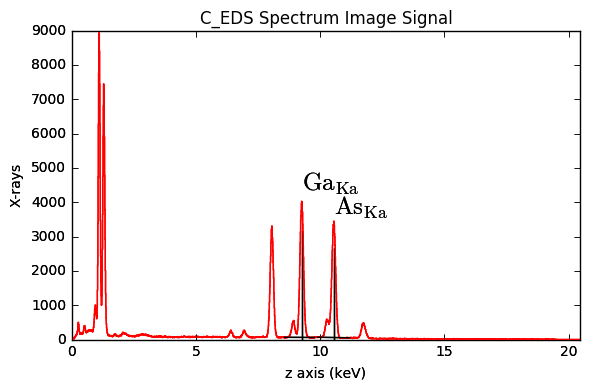

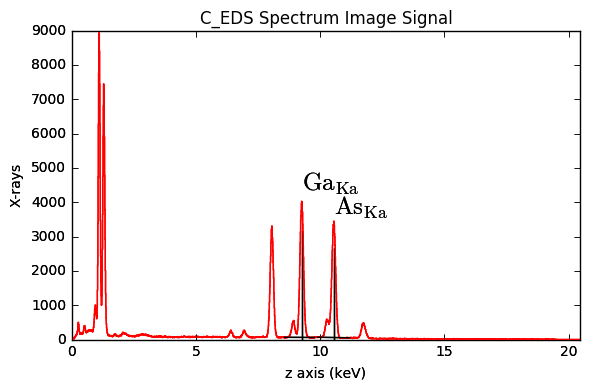

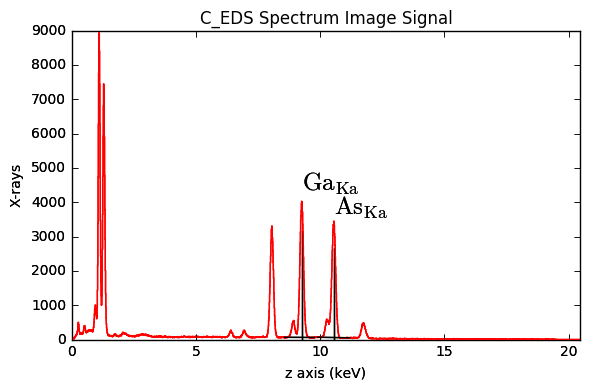

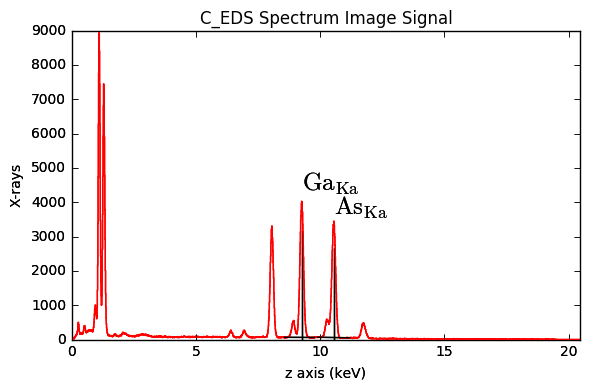

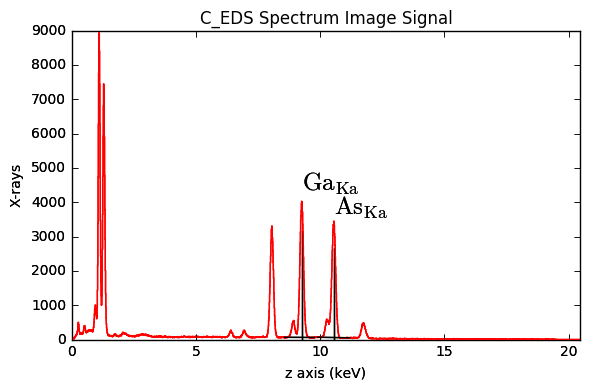

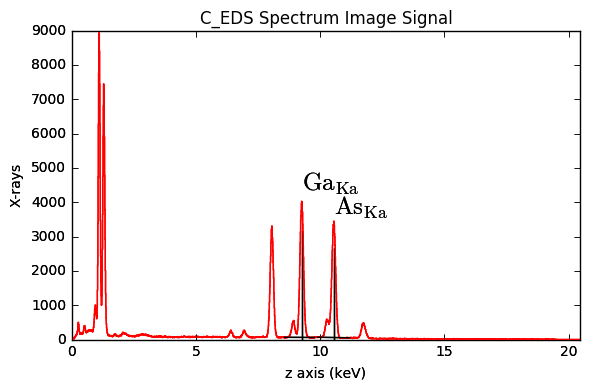

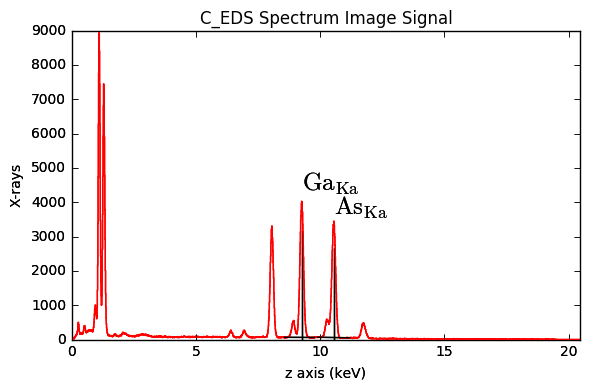

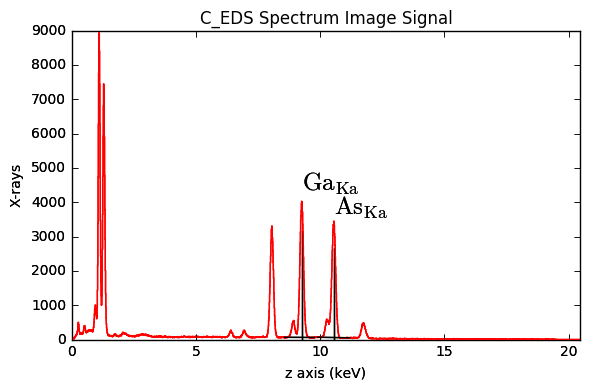

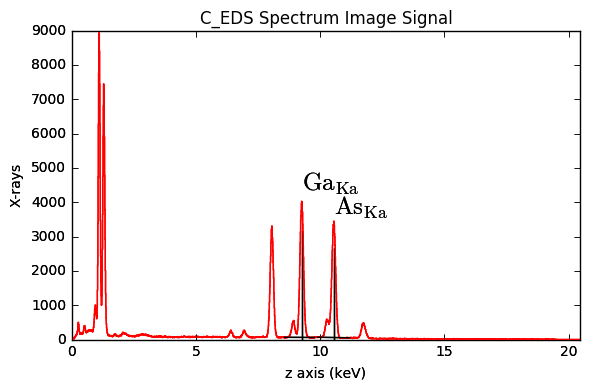

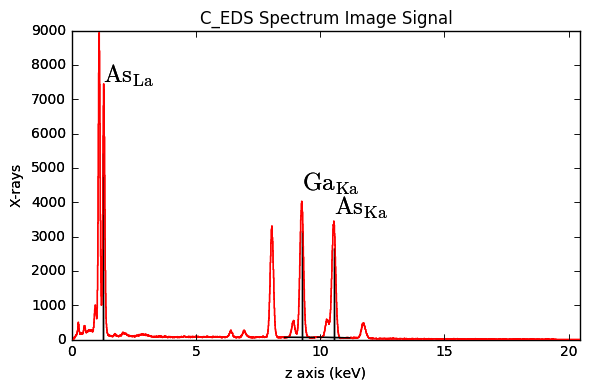

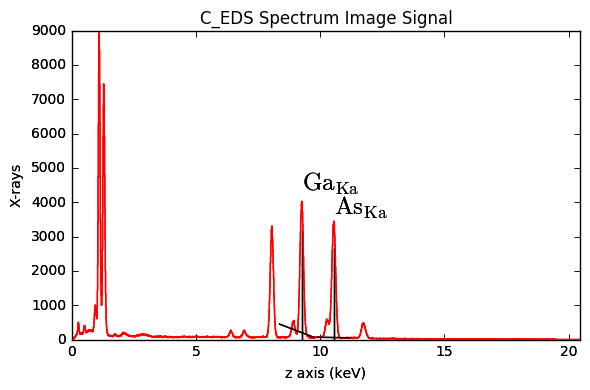

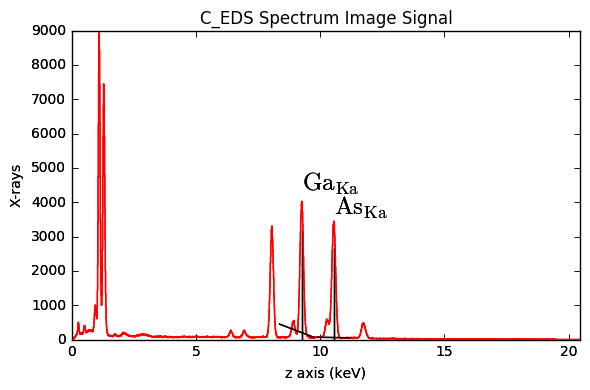

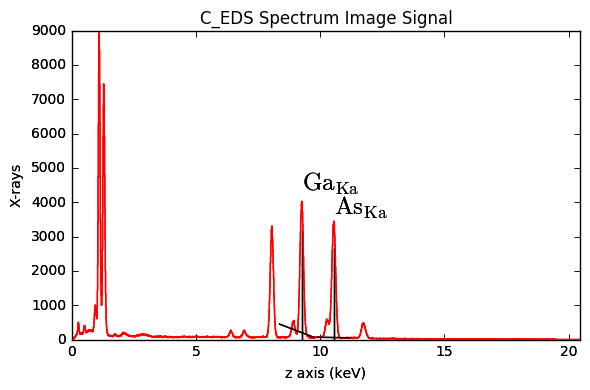

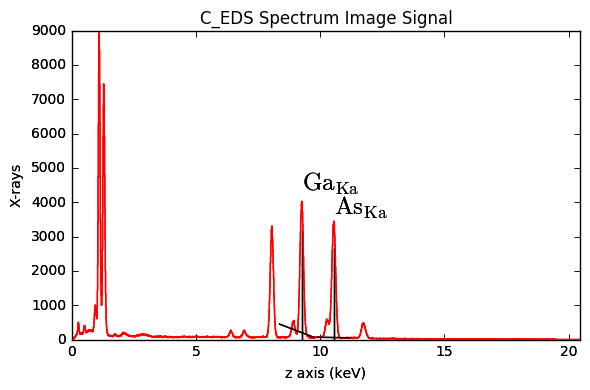

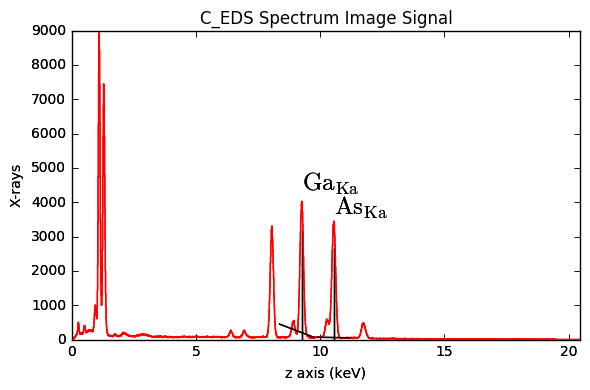

In [23]:
import matplotlib.pyplot as plt
plt.show()

In [53]:
%load_ext autoreload
%autoreload 2

a_A1 = hs.load('../Data/unheated/A_EDS Ge.hdf5')
a_A2 = hs.load('../Data/unheated/A_EDS Pd.hdf5')

plt.close('all')
IW = 1.2
tilt = -np.sqrt(2.3**2+.6**2)

current= (0.1769+.1747)/2

p_Ge = hs.material.elements.Ge.Physical_properties.density_gcm3*1000
p_Pd = hs.material.elements.Pd.Physical_properties.density_gcm3*1000
elements = [['Ge'],['Pd']]

# BW_ge = np.array([[9.25, 9.45,10.1,10.3]]) #K-line
BW_ge = np.array([[.6,.7,1.4,1.5]]) #Ge L-line
BW_pd = np.array([[2.2,2.4,3.7,3.9]])
lines = [['Ge_La'],['Pd_La']]
comp=[1]

t = 0.01
for s, bw,density,element,line in zip([a_A2,a_A1],[BW_ge,BW_pd],[p_Ge,p_Pd],elements,lines):
    
    time = s.data.shape[0]*s.data.shape[1]*t
    edx=s.sum('x').sum('y')
    edx.add_elements(element)
    edx.add_lines(line)

    edx.plot(background_windows=bw)

    edx.set_microscope_parameters(beam_current=current, tilt_stage=tilt, real_time=time, elevation_angle=24.3, azimuth_angle=0.0)
    s_int=edx.get_lines_intensity(background_windows=bw, integration_windows=IW,plot_result=0,only_lines=line)

    zeta = determine_zeta_factor(edx, s_int, comp, thickness, density)
    print(element)
    for z in zeta:
        print('zeta',np.nanmean(z.data.flatten()))


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


C:\Users\Johannes\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\__init__.py:898: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


['Ge']
zeta 933.357024269


C:\Users\Johannes\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\__init__.py:898: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


['Pd']
zeta 1284.10806052
